In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
from visual_behavior.data_access import loading as loading
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache


In [4]:
import visual_behavior.utilities as vbu
import visual_behavior.visualization.utils as utils
import visual_behavior.data_access.utilities as utilities

import visual_behavior.visualization.ophys.platform_paper_figures as ppf
import visual_behavior.visualization.ophys.summary_figures as sf
import visual_behavior.visualization.ophys.experiment_summary_figures as df

### load behavior_sessions 

In [5]:
experiments_table = loading.get_platform_paper_experiment_table()
print(len(experiments_table))

1249


In [6]:
cells_table = loading.get_cell_table()

In [7]:
original_behavior_sessions = loading.get_platform_paper_behavior_session_table()
print(len(original_behavior_sessions.index.unique()))
print(len(original_behavior_sessions.loc[experiments_table.behavior_session_id.values]))

4345
1249


### add experience level and limit to training 4&5

In [8]:
session_types = ['TRAINING_4_images_A_handoff_ready',
                   'TRAINING_5_images_A_epilogue',
                   'TRAINING_5_images_A_handoff_ready',
                   'TRAINING_5_images_B_epilogue',
                   'TRAINING_5_images_B_handoff_ready',]

In [9]:
# add experience level
behavior_sessions = original_behavior_sessions.merge(experiments_table[['behavior_session_id', 'experience_level']], on='behavior_session_id', how='left')
# drop duplicates
behavior_sessions = behavior_sessions.drop_duplicates(subset='behavior_session_id')
print(len(behavior_sessions.behavior_session_id.unique()))
print(behavior_sessions.experience_level.unique())
# reset index
behavior_sessions = behavior_sessions.set_index('behavior_session_id')
print(len(behavior_sessions.index.unique()))
print(behavior_sessions.experience_level.unique())
# set sessions 4 & 5 to 'Training'
indices = behavior_sessions[behavior_sessions.session_type.isin(session_types)].index.values
behavior_sessions.loc[indices, 'experience_level'] = 'Training'
print(len(behavior_sessions.index.unique()))
print(behavior_sessions.experience_level.unique())
# drop NA
behavior_sessions = behavior_sessions[behavior_sessions.experience_level.isnull()==False]
print(len(behavior_sessions.index.unique()))


4345
[nan 'Familiar' 'Novel 1' 'Novel >1']
4345
[nan 'Familiar' 'Novel 1' 'Novel >1']
4345
[nan 'Training' 'Familiar' 'Novel 1' 'Novel >1']
1472


In [10]:
# all behavior sessions in expts table are in behavior_sessions
print(len(behavior_sessions.loc[experiments_table.behavior_session_id.values]))
# but there are multiple behavior sessions per experiment ID, 
# so the actual number of ophys sessions in behavior_sessions is less
# number of ophys sessions
print(len(behavior_sessions[behavior_sessions.session_type.str.contains('OPHYS')==True]))

1249
545


In [11]:
# number of behavior sessions
len(behavior_sessions[behavior_sessions.session_type.str.contains('OPHYS')==False])

927

### load metrics data

In [12]:
%%time 

behavior_session_ids = behavior_sessions.index.values

behavior_stats = pd.DataFrame()
problem_sessions = []
for behavior_session_id in tqdm(behavior_session_ids):
    try:
        stats = vbu.get_cached_behavior_stats(behavior_session_id, engaged_only=True, method='stimulus_based')
        behavior_stats = pd.concat([behavior_stats, stats])
    except:
        print('cant load stats for', behavior_session_id)
        problem_sessions.append(behavior_session_id)

  2%|█▊                                                                              | 33/1472 [00:01<01:02, 23.06it/s]

cant load stats for 952554548
cant load stats for 958888263


  4%|██▊                                                                             | 52/1472 [00:02<00:48, 29.35it/s]

cant load stats for 993995204


  4%|███▎                                                                            | 60/1472 [00:02<00:48, 29.37it/s]

cant load stats for 995570835


  4%|███▍                                                                            | 64/1472 [00:02<00:51, 27.20it/s]

cant load stats for 796052844


C:\Users\marinag\Anaconda3\envs\visual_behavior_sdk\lib\site-packages\ipykernel_launcher.py:8: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.


  5%|████▏                                                                           | 77/1472 [00:03<00:59, 23.38it/s]

cant load stats for 830255592
cant load stats for 836399024


  6%|████▉                                                                           | 91/1472 [00:03<00:52, 26.11it/s]

cant load stats for 993706715
cant load stats for 994880774


  7%|█████▊                                                                         | 108/1472 [00:04<00:50, 27.27it/s]

cant load stats for 876678452
cant load stats for 880046522


 11%|████████▌                                                                      | 159/1472 [00:06<01:14, 17.70it/s]

cant load stats for 939537734
cant load stats for 942329079


 13%|██████████                                                                     | 187/1472 [00:07<00:47, 27.31it/s]

cant load stats for 932884713
cant load stats for 938745166


 14%|███████████▏                                                                   | 208/1472 [00:08<00:54, 23.32it/s]

cant load stats for 989340717
cant load stats for 990520288


 15%|███████████▋                                                                   | 218/1472 [00:09<01:04, 19.57it/s]

cant load stats for 966735404


 15%|███████████▊                                                                   | 221/1472 [00:10<02:19,  8.99it/s]

cant load stats for 969339750


 19%|██████████████▊                                                                | 276/1472 [00:13<00:41, 28.51it/s]

cant load stats for 938339083
cant load stats for 942350598


 20%|███████████████▋                                                               | 293/1472 [00:14<00:39, 30.17it/s]

cant load stats for 919485101
cant load stats for 923417336


 21%|████████████████▍                                                              | 306/1472 [00:14<00:38, 30.60it/s]

cant load stats for 1042312802
cant load stats for 1044393407


 22%|█████████████████▎                                                             | 322/1472 [00:15<00:35, 32.02it/s]

cant load stats for 854621677
cant load stats for 863610582


 24%|███████████████████▏                                                           | 358/1472 [00:17<00:42, 26.37it/s]

cant load stats for 1049260803


 25%|████████████████████▏                                                          | 375/1472 [00:17<00:38, 28.56it/s]

cant load stats for 1047537125
cant load stats for 1049263847


 26%|████████████████████▌                                                          | 383/1472 [00:18<00:37, 29.07it/s]

cant load stats for 848943191
cant load stats for 855446545


 28%|██████████████████████▍                                                        | 417/1472 [00:19<00:43, 24.26it/s]

cant load stats for 938991494
cant load stats for 946172858


 31%|████████████████████████▋                                                      | 461/1472 [00:21<00:57, 17.58it/s]

cant load stats for 931566300
cant load stats for 938377224
cant load stats for 939538572


 32%|█████████████████████████▌                                                     | 476/1472 [00:22<00:58, 16.89it/s]

cant load stats for 961246494
cant load stats for 965727499


 33%|██████████████████████████▏                                                    | 489/1472 [00:23<00:49, 19.74it/s]

cant load stats for 1069254185


 34%|██████████████████████████▊                                                    | 500/1472 [00:24<00:59, 16.39it/s]

cant load stats for 778166125
cant load stats for 796032489


 35%|███████████████████████████▎                                                   | 509/1472 [00:24<00:53, 17.88it/s]

cant load stats for 1050640525
cant load stats for 1051910175


 35%|███████████████████████████▊                                                   | 519/1472 [00:25<00:50, 19.01it/s]

cant load stats for 1066064565
cant load stats for 1067818154


 37%|█████████████████████████████▍                                                 | 548/1472 [00:27<01:06, 13.88it/s]

cant load stats for 1081053903
cant load stats for 1082281601


 39%|██████████████████████████████▋                                                | 571/1472 [00:29<01:33,  9.63it/s]

cant load stats for 1053736358
cant load stats for 1054133730


 39%|███████████████████████████████▏                                               | 580/1472 [00:30<01:13, 12.10it/s]

cant load stats for 993537991
cant load stats for 993959724
cant load stats for 994882261


 41%|████████████████████████████████                                               | 598/1472 [00:32<01:24, 10.29it/s]

cant load stats for 890625596
cant load stats for 893488330


 41%|████████████████████████████████▋                                              | 610/1472 [00:33<01:14, 11.52it/s]

cant load stats for 918436840
cant load stats for 928809619


 42%|█████████████████████████████████▏                                             | 619/1472 [00:33<01:02, 13.74it/s]

cant load stats for 1007744712
cant load stats for 1008535747


 44%|██████████████████████████████████▉                                            | 652/1472 [00:37<01:14, 10.96it/s]

cant load stats for 1085947730
cant load stats for 1087316574


 46%|████████████████████████████████████▏                                          | 675/1472 [00:40<01:25,  9.33it/s]

cant load stats for 1052351763
cant load stats for 1056084114


 47%|█████████████████████████████████████▍                                         | 698/1472 [00:43<01:12, 10.62it/s]

cant load stats for 1038793248
cant load stats for 1039543061


 48%|██████████████████████████████████████                                         | 709/1472 [00:43<01:03, 12.04it/s]

cant load stats for 956213722
cant load stats for 959893902


 49%|██████████████████████████████████████▉                                        | 725/1472 [00:45<00:59, 12.52it/s]

cant load stats for 886440437
cant load stats for 888282547


 50%|███████████████████████████████████████▋                                       | 740/1472 [00:47<01:21,  8.97it/s]

cant load stats for 1081773193
cant load stats for 1083458354


 51%|████████████████████████████████████████▋                                      | 757/1472 [00:49<01:19,  9.03it/s]

cant load stats for 992414875
cant load stats for 993496240


 53%|█████████████████████████████████████████▍                                     | 773/1472 [00:50<01:15,  9.21it/s]

cant load stats for 847867029
cant load stats for 853266283


 53%|█████████████████████████████████████████▉                                     | 782/1472 [00:51<01:03, 10.81it/s]

cant load stats for 890033129
cant load stats for 898440124


 54%|██████████████████████████████████████████▋                                    | 795/1472 [00:52<00:45, 14.92it/s]

cant load stats for 980102697
cant load stats for 982722856


 55%|███████████████████████████████████████████▏                                   | 805/1472 [00:52<00:37, 17.69it/s]

cant load stats for 1059661558
cant load stats for 1061244184


 56%|████████████████████████████████████████████▎                                  | 825/1472 [00:55<01:02, 10.35it/s]

cant load stats for 881278000


 56%|████████████████████████████████████████████▍                                  | 829/1472 [00:55<00:54, 11.71it/s]

cant load stats for 890157940


 57%|████████████████████████████████████████████▉                                  | 838/1472 [00:56<00:56, 11.24it/s]

cant load stats for 1043099283
cant load stats for 1044396778


 58%|█████████████████████████████████████████████▍                                 | 847/1472 [00:56<00:43, 14.40it/s]

cant load stats for 811303680


 59%|██████████████████████████████████████████████▉                                | 874/1472 [01:00<01:15,  7.94it/s]

cant load stats for 947336783
cant load stats for 949348713


 61%|███████████████████████████████████████████████▊                               | 891/1472 [01:02<01:07,  8.61it/s]

cant load stats for 1003922111


 61%|████████████████████████████████████████████████▏                              | 898/1472 [01:02<00:46, 12.23it/s]

cant load stats for 815521974


 62%|████████████████████████████████████████████████▌                              | 906/1472 [01:03<00:47, 11.97it/s]

cant load stats for 963923531
cant load stats for 967460086


 62%|█████████████████████████████████████████████████                              | 915/1472 [01:04<00:44, 12.46it/s]

cant load stats for 1010433346
cant load stats for 1011921821


 63%|██████████████████████████████████████████████████                             | 933/1472 [01:05<00:49, 10.83it/s]

cant load stats for 993471955


 66%|████████████████████████████████████████████████████▎                          | 974/1472 [01:11<00:45, 10.86it/s]

cant load stats for 1077877836


 67%|████████████████████████████████████████████████████▉                          | 987/1472 [01:12<00:53,  9.10it/s]

cant load stats for 849136474
cant load stats for 851757903


 69%|█████████████████████████████████████████████████████▊                        | 1015/1472 [01:16<00:57,  7.99it/s]

cant load stats for 1001417592
cant load stats for 1003302686


 70%|██████████████████████████████████████████████████████▌                       | 1030/1472 [01:17<00:37, 11.92it/s]

cant load stats for 1004058414


 70%|██████████████████████████████████████████████████████▊                       | 1035/1472 [01:17<00:30, 14.31it/s]

cant load stats for 1006754246


 71%|███████████████████████████████████████████████████████▎                      | 1043/1472 [01:18<00:38, 11.17it/s]

cant load stats for 870660821


 74%|█████████████████████████████████████████████████████████▌                    | 1087/1472 [01:24<00:50,  7.70it/s]

cant load stats for 1077900668


 75%|██████████████████████████████████████████████████████████▏                   | 1099/1472 [01:25<00:38,  9.63it/s]

cant load stats for 843203333
cant load stats for 848503804


 75%|██████████████████████████████████████████████████████████▋                   | 1108/1472 [01:26<00:28, 12.70it/s]

cant load stats for 964137490
cant load stats for 967660435


 77%|███████████████████████████████████████████████████████████▋                  | 1127/1472 [01:28<00:35,  9.75it/s]

cant load stats for 1076274259
cant load stats for 1077739803


 77%|████████████████████████████████████████████████████████████▏                 | 1135/1472 [01:29<00:28, 11.99it/s]

cant load stats for 959675291
cant load stats for 963694974


 78%|█████████████████████████████████████████████████████████████▏                | 1154/1472 [01:31<00:30, 10.55it/s]

cant load stats for 837108110


 79%|█████████████████████████████████████████████████████████████▌                | 1162/1472 [01:32<00:30, 10.18it/s]

cant load stats for 972018960
cant load stats for 974282914


 81%|███████████████████████████████████████████████████████████████               | 1191/1472 [01:35<00:31,  9.06it/s]

cant load stats for 903977177
cant load stats for 907327499


 82%|███████████████████████████████████████████████████████████████▋              | 1202/1472 [01:36<00:30,  8.85it/s]

cant load stats for 911527254
cant load stats for 915667469


 83%|████████████████████████████████████████████████████████████████▌             | 1219/1472 [01:38<00:28,  8.72it/s]

cant load stats for 882434675
cant load stats for 890374401


 84%|█████████████████████████████████████████████████████████████████▏            | 1230/1472 [01:39<00:21, 11.38it/s]

cant load stats for 795431009
cant load stats for 797170547


 84%|█████████████████████████████████████████████████████████████████▍            | 1235/1472 [01:39<00:18, 12.80it/s]

cant load stats for 867098393
cant load stats for 873813922


 85%|█████████████████████████████████████████████████████████████████▉            | 1245/1472 [01:40<00:15, 15.06it/s]

cant load stats for 1056990700
cant load stats for 1057802395


 86%|███████████████████████████████████████████████████████████████████▏          | 1267/1472 [01:43<00:18, 10.97it/s]

cant load stats for 976558967


 86%|███████████████████████████████████████████████████████████████████▎          | 1271/1472 [01:43<00:16, 12.18it/s]

cant load stats for 986234827


 88%|████████████████████████████████████████████████████████████████████▋         | 1297/1472 [01:46<00:21,  8.13it/s]

cant load stats for 917595407
cant load stats for 922012422


 89%|█████████████████████████████████████████████████████████████████████         | 1303/1472 [01:47<00:14, 11.37it/s]

cant load stats for 927905748


 89%|█████████████████████████████████████████████████████████████████████▌        | 1312/1472 [01:47<00:13, 11.64it/s]

cant load stats for 807198458
cant load stats for 809321253


 89%|█████████████████████████████████████████████████████████████████████▊        | 1317/1472 [01:48<00:14, 10.33it/s]

cant load stats for 806841326
cant load stats for 811355443


 91%|██████████████████████████████████████████████████████████████████████▊       | 1336/1472 [01:50<00:20,  6.56it/s]

cant load stats for 850817466
cant load stats for 853505213
cant load stats for 857230827


 91%|███████████████████████████████████████████████████████████████████████▎      | 1346/1472 [01:51<00:12, 10.24it/s]

cant load stats for 849147676
cant load stats for 855200229


 93%|████████████████████████████████████████████████████████████████████████▎     | 1364/1472 [01:53<00:13,  7.85it/s]

cant load stats for 983268644


 93%|████████████████████████████████████████████████████████████████████████▌     | 1369/1472 [01:53<00:09, 10.59it/s]

cant load stats for 990207794


 94%|█████████████████████████████████████████████████████████████████████████     | 1378/1472 [01:54<00:07, 12.02it/s]

cant load stats for 902135840
cant load stats for 903842232


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1401/1472 [01:57<00:09,  7.33it/s]

cant load stats for 904574580
cant load stats for 907900077


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1407/1472 [01:57<00:06, 10.69it/s]

cant load stats for 914211263
cant load stats for 915418411


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1419/1472 [01:59<00:04, 11.94it/s]

cant load stats for 1083433827
cant load stats for 1085106649


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1437/1472 [02:01<00:05,  5.88it/s]

cant load stats for 1083463510
cant load stats for 1085143107


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1447/1472 [02:02<00:02,  9.34it/s]

cant load stats for 1047958394
cant load stats for 1050651840


 99%|█████████████████████████████████████████████████████████████████████████████ | 1454/1472 [02:02<00:01,  9.37it/s]

cant load stats for 962922731
cant load stats for 964871967


100%|██████████████████████████████████████████████████████████████████████████████| 1472/1472 [02:04<00:00, 11.86it/s]

cant load stats for 942562699
cant load stats for 954120560
Wall time: 2min 4s


In [13]:
len(problem_sessions)

159

In [14]:
print(len(behavior_sessions))
print(behavior_sessions.experience_level.unique())

1472
['Training' 'Familiar' 'Novel 1' 'Novel >1']


### merge behavior session metadata into stats table

In [15]:
behavior_stats = behavior_stats.merge(behavior_sessions, on='behavior_session_id')
print(len(behavior_sessions))
print(behavior_sessions.experience_level.unique())

1472
['Training' 'Familiar' 'Novel 1' 'Novel >1']


In [16]:
# useful info
experience_levels = ['Training', 'Familiar', 'Novel 1', 'Novel >1']
print(experience_levels)
cell_types = np.sort(behavior_sessions.cell_type.unique())

['Training', 'Familiar', 'Novel 1', 'Novel >1']


### plot stuff by cre line

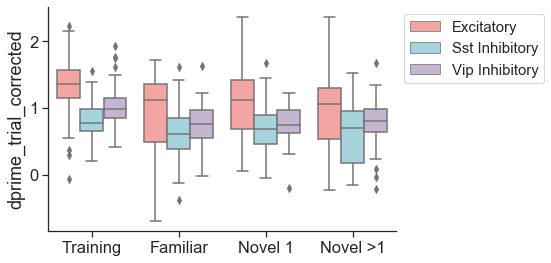

In [17]:
metric = 'dprime_trial_corrected'
# colors = utils.get_experience_level_colors()
colors = utils.get_cre_line_colors()

fig, ax = plt.subplots(figsize=(8,4))
ax = sns.boxplot(data=behavior_stats, x='experience_level', y=metric, order=experience_levels, 
                  hue='cell_type', hue_order=cell_types, palette=colors)
ax.legend(fontsize='small', title='', bbox_to_anchor=(1,1))
ax.set_xlabel('')

fig.tight_layout()

### color by exp level per cre line

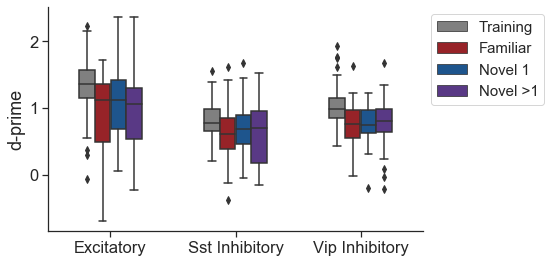

In [18]:
metric = 'dprime_trial_corrected'
colors = utils.get_experience_level_colors()
colors = [(0.5, 0.5, 0.5)]+colors

fig, ax = plt.subplots(figsize=(8,4))
ax = sns.boxplot(data=behavior_stats, x='cell_type', y=metric, order=cell_types, 
                  hue='experience_level', hue_order=experience_levels, palette=colors, width=0.5, dodge=True)
ax.legend(fontsize='small', title='', bbox_to_anchor=(1,1))
ax.set_xlabel('')
ax.set_ylabel('d-prime')
fig.tight_layout()

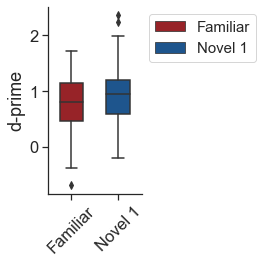

In [19]:
metric = 'dprime_trial_corrected'
colors = utils.get_experience_level_colors()

data = behavior_stats[behavior_stats.experience_level.isin(['Training', 'Novel >1'])==False]
familiar_novel = ['Familiar', 'Novel 1']

fig, ax = plt.subplots(figsize=(4,4))
ax = sns.boxplot(data=data, x='experience_level', y=metric, order=familiar_novel, 
                  hue='experience_level', hue_order=familiar_novel, palette=colors, width=0.5, dodge=False)
ax.legend(fontsize='small', title='', bbox_to_anchor=(1,1))
ax.set_xlabel('')
ax.set_xticklabels(familiar_novel, rotation=45)
ax.set_ylabel('d-prime')
fig.tight_layout()

### plot d-prime for familiar and novel sessions, just for the ophys sessions included in subsequent ophys analysis

In [21]:
save_dir = r'\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\platform_paper_plots\figure_1'

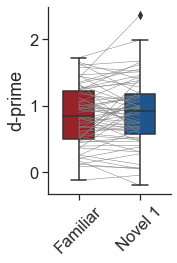

In [22]:
metric = 'dprime_trial_corrected'
colors = utils.get_experience_level_colors()

data = behavior_stats[behavior_stats.experience_level.isin(['Training', 'Novel >1'])==False]
familiar_novel = ['Familiar', 'Novel 1']

ophys_expts = utilities.limit_to_last_familiar_second_novel_active(experiments_table)
ophys_expts = utilities.limit_to_containers_with_all_experience_levels(ophys_expts)
ophys_beh_sessions = ophys_expts.behavior_session_id.unique()
data = data[data.behavior_session_id.isin(ophys_beh_sessions)]

figsize = (3,4)
fig, ax = plt.subplots(figsize=figsize)
for mouse_id in data.mouse_id.unique():
    ax = sns.pointplot(data=data[data.mouse_id==mouse_id], x='experience_level', y=metric, markers='',
                       order=familiar_novel, color='gray', join=True, dodge=False)
plt.setp(ax.lines, linewidth=0.5)  
ax = sns.boxplot(data=data, x='experience_level', y=metric, order=familiar_novel, 
                  hue='experience_level', hue_order=familiar_novel, palette=colors, width=0.5, dodge=False)
# ax.legend(fontsize='small', title='', bbox_to_anchor=(1,1))
ax.get_legend().remove()
ax.set_xlabel('')
ax.set_xticklabels(familiar_novel, rotation=45)
ax.set_ylabel('d-prime')
fig.tight_layout()
utils.save_figure(fig, figsize, save_dir, 'behavior_metrics', 'd_prime_dist_and_individ_mice')

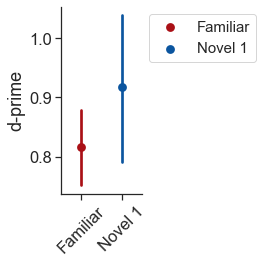

In [25]:
metric = 'dprime_trial_corrected'
colors = utils.get_experience_level_colors()

data = behavior_stats[behavior_stats.experience_level.isin(['Training', 'Novel >1'])==False]
familiar_novel = ['Familiar', 'Novel 1']

fig, ax = plt.subplots(figsize=(4,4))
ax = sns.pointplot(data=data, x='experience_level', y=metric, order=familiar_novel, 
                  hue='experience_level', hue_order=familiar_novel, palette=colors, join=False, dodge=False)
ax.legend(fontsize='small', title='', bbox_to_anchor=(1,1))
ax.set_xlabel('')
ax.set_xticklabels(familiar_novel, rotation=45)
ax.set_ylabel('d-prime')
fig.tight_layout()

,behavior_session_id,dprime_non_trial_corrected,dprime_trial_corrected,error,fa_rate,fraction_engaged,hit_rate,number_of_engaged_catch_trials,number_of_engaged_false_alarms,number_of_engaged_go_trials,...,ophys_session_id,ophys_experiment_id,ophys_container_id,project_code,date_of_acquisition,session_type,file_id,passive,cell_type,experience_level
0,884776248,0.923742,0.923742,NaN,0.445255,1.0,0.784091,411.0,183.0,88.0,...,NaN,NaN,NaN,NaN,2019-06-11 11:51:02.415,TRAINING_5_images_A_epilogue,1.081630e+09,False,Sst Inhibitory,Training
1,885540237,0.623553,0.623553,NaN,0.173585,1.0,0.375796,1060.0,184.0,157.0,...,NaN,NaN,NaN,NaN,2019-06-12 11:10:55.978,TRAINING_5_images_A_handoff_ready,1.081631e+09,False,Sst Inhibitory,Training
2,886442346,0.956242,0.956242,NaN,0.415344,1.0,0.771084,378.0,157.0,83.0,...,NaN,NaN,NaN,NaN,2019-06-13 13:13:29.587,TRAINING_5_images_A_handoff_ready,1.081632e+09,False,Sst Inhibitory,Training
3,892510304,0.614751,0.614751,NaN,0.250871,1.0,0.477273,861.0,216.0,132.0,...,NaN,NaN,NaN,NaN,2019-06-21 10:48:46.019,TRAINING_5_images_A_handoff_ready,1.081641e+09,False,Sst Inhibitory,Training
4,893560763,1.713756,1.553515,NaN,0.729927,1.0,1.000000,137.0,100.0,33.0,...,NaN,NaN,NaN,NaN,2019-06-24 13:10:41.640,TRAINING_5_images_A_handoff_ready,1.081642e+09,False,Sst Inhibitory,Training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,944950609,0.766016,0.766016,NaN,0.546875,1.0,0.811594,256.0,140.0,69.0,...,944810835.0,[945473009],[929913236],VisualBehavior,2019-09-12 10:57:08.386,OPHYS_3_images_A,NaN,False,Vip Inhibitory,Familiar
1309,947311015,0.580280,0.580280,NaN,0.371859,1.0,0.600000,597.0,222.0,90.0,...,946951902.0,[947716576],[929913236],VisualBehavior,2019-09-16 11:58:09.088,OPHYS_3_images_A,NaN,False,Vip Inhibitory,Familiar
1310,948206919,0.829001,0.829001,NaN,0.386824,1.0,0.705882,592.0,229.0,102.0,...,948090163.0,[948507789],[929913236],VisualBehavior,2019-09-17 10:57:00.923,OPHYS_3_images_A,NaN,False,Vip Inhibitory,Familiar
1311,950157787,0.747872,0.747872,NaN,0.144817,1.0,0.377880,1312.0,190.0,217.0,...,949209988.0,[950833329],[929913236],VisualBehavior,2019-09-19 11:24:18.459,OPHYS_4_images_B,NaN,False,Vip Inhibitory,Novel 1


In [ ]:
metric = 'dprime_trial_corrected'
colors = utils.get_experience_level_colors()
colors = utils.get_experience_level_colors()
colors = [(0.5, 0.5, 0.5)]+colors

metrics = ['dprime_non_trial_corrected',
       'dprime_trial_corrected', 'error', 'fa_rate', 'fraction_engaged',
       'hit_rate', 'number_of_engaged_catch_trials',
       'number_of_engaged_false_alarms', 'number_of_engaged_go_trials',
       'number_of_engaged_hits', 'response_latency_25%',
       'response_latency_50%', 'response_latency_75%',
       'response_latency_count', 'response_latency_max',
       'response_latency_mean', 'response_latency_min', 'response_latency_std',]

for metric in metrics: 
    fig, ax = plt.subplots(figsize=(8,4))
    ax = sns.boxplot(data=behavior_stats, x='cell_type', y=metric, order=cell_types, 
                      hue='experience_level', hue_order=experience_levels, palette=colors, width=0.5, dodge=True)
    ax.legend(fontsize='small', title='', bbox_to_anchor=(1,1))
    ax.set_xlabel('')
    fig.tight_layout()

In [ ]:
metric = 'dprime_trial_corrected'
colors = utils.get_experience_level_colors()
# colors = utils.get_cre_line_colors()

fig, ax = plt.subplots(figsize=(6,5))
ax = sns.boxplot(data=behavior_stats, x='experience_level', y=metric, order=experience_levels, 
                  hue='experience_level', hue_order=experience_levels, palette=colors)

ValueError: Could not interpret input 'd_prime_trial_corrected'

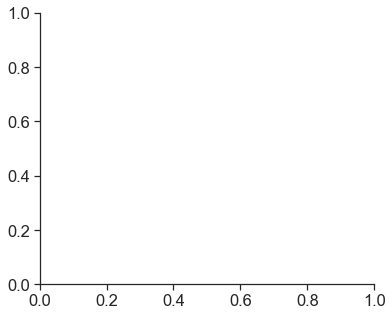

In [38]:
metric = 'dprime_trial_corrected'
colors = utils.get_experience_level_colors()
# colors = utils.get_cre_line_colors()

fig, ax = plt.subplots(figsize=(6,5))
ax = sns.pointplot(data=behavior_stats, x='experience_level', y=metric, order=experience_levels, 
                  hue='experience_level', hue_order=experience_levels, palette=colors)

fig, ax = plt.subplots(figsize=(6,5))
ax = sns.boxplot(data=behavior_stats, x='experience_level', y=metric, order=experience_levels, 
                  hue='experience_level', hue_order=experience_levels, palette=colors)

fig, ax = plt.subplots(figsize=(6,5))
ax = sns.swarmplot(data=behavior_stats, x='experience_level', y=metric, order=experience_levels, 
                  hue='experience_level', hue_order=experience_levels, palette=colors)